# 2 Data wrangling<a id='2_Data_wrangling'></a>

### 2.1 Importing Necessary Modules and Data

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [48]:
filename = 'flare.data2'
df = pd.read_csv(filename,skiprows = 1, delimiter = ' ', header = None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0


### 2.2 Investigation

We import the necessary modules and load our data. The first thing we notice is that this file comes with no columns, so we will need to add these in manually.

In [49]:
col = ['Zurich_Class','Largest_Spot_Size','Spot_Distribution','Activity','Evolution','Prev_24h_Activity','Historically_Complex','Become_Historically_Complex','Area','Area_Of_Largest','C_Class_Flares','M_Class_Flares','X_Class_Flares']

df.columns = col
df.head()

,Zurich_Class,Largest_Spot_Size,Spot_Distribution,Activity,Evolution,Prev_24h_Activity,Historically_Complex,Become_Historically_Complex,Area,Area_Of_Largest,C_Class_Flares,M_Class_Flares,X_Class_Flares
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0


The column names appear in our dataframe now. Next, we will take the first 3 columns and turn them into numeric values. They are given a class label but to help feed this into our models later on, we will turn them into numeric values now.

In [50]:
df[['Zurich_Class']] = df[['Zurich_Class']].replace(['A','B','C','D','E','F','G','H'], [1,2,3,4,5,6,7,8])

df[['Largest_Spot_Size']] = df[['Largest_Spot_Size']].replace(['X','R','S','A','H','K'], [1,2,3,4,5,6])

df[['Spot_Distribution']] = df[['Spot_Distribution']].replace(['X','O','I','C'], [1,2,3,4])

df.head()

,Zurich_Class,Largest_Spot_Size,Spot_Distribution,Activity,Evolution,Prev_24h_Activity,Historically_Complex,Become_Historically_Complex,Area,Area_Of_Largest,C_Class_Flares,M_Class_Flares,X_Class_Flares
0,8,4,1,1,3,1,1,1,1,1,0,0,0
1,4,2,2,1,3,1,1,2,1,1,0,0,0
2,3,3,2,1,3,1,1,2,1,1,0,0,0
3,8,2,1,1,2,1,1,1,1,1,0,0,0
4,8,3,1,1,1,1,1,2,1,1,0,0,0


In [51]:
df.dtypes

Zurich_Class                   int64
Largest_Spot_Size              int64
Spot_Distribution              int64
Activity                       int64
Evolution                      int64
Prev_24h_Activity              int64
Historically_Complex           int64
Become_Historically_Complex    int64
Area                           int64
Area_Of_Largest                int64
C_Class_Flares                 int64
M_Class_Flares                 int64
X_Class_Flares                 int64
dtype: object

All of our data is now numeric which will help us out later on. Next, we will take a look to see if we have any missing data.

In [52]:
df.isna().sum()

Zurich_Class                   0
Largest_Spot_Size              0
Spot_Distribution              0
Activity                       0
Evolution                      0
Prev_24h_Activity              0
Historically_Complex           0
Become_Historically_Complex    0
Area                           0
Area_Of_Largest                0
C_Class_Flares                 0
M_Class_Flares                 0
X_Class_Flares                 0
dtype: int64

None of the columns have any null data. Lastly, we want to take a quick look to see if there seem to be any extreme values. Extreme values can possibly be errors in the recording and can skew the model if trained on. We want to investigate them and determine if that row seems reasonable to keep or if it should be removed.

In [53]:
Max = []
Min = []

for i in df.columns :
    Max.append(df[i].max())
    Min.append(df[i].min())

maxmindf = pd.DataFrame([col,Max,Min])
maxmindf = maxmindf.transpose()
maxmindf.columns = ['Column Name','Max Value','Min Value']
maxmindf

,Column Name,Max Value,Min Value
0,Zurich_Class,8,2
1,Largest_Spot_Size,6,1
2,Spot_Distribution,4,1
3,Activity,2,1
4,Evolution,3,1
5,Prev_24h_Activity,3,1
6,Historically_Complex,2,1
7,Become_Historically_Complex,2,1
8,Area,2,1
9,Area_Of_Largest,1,1


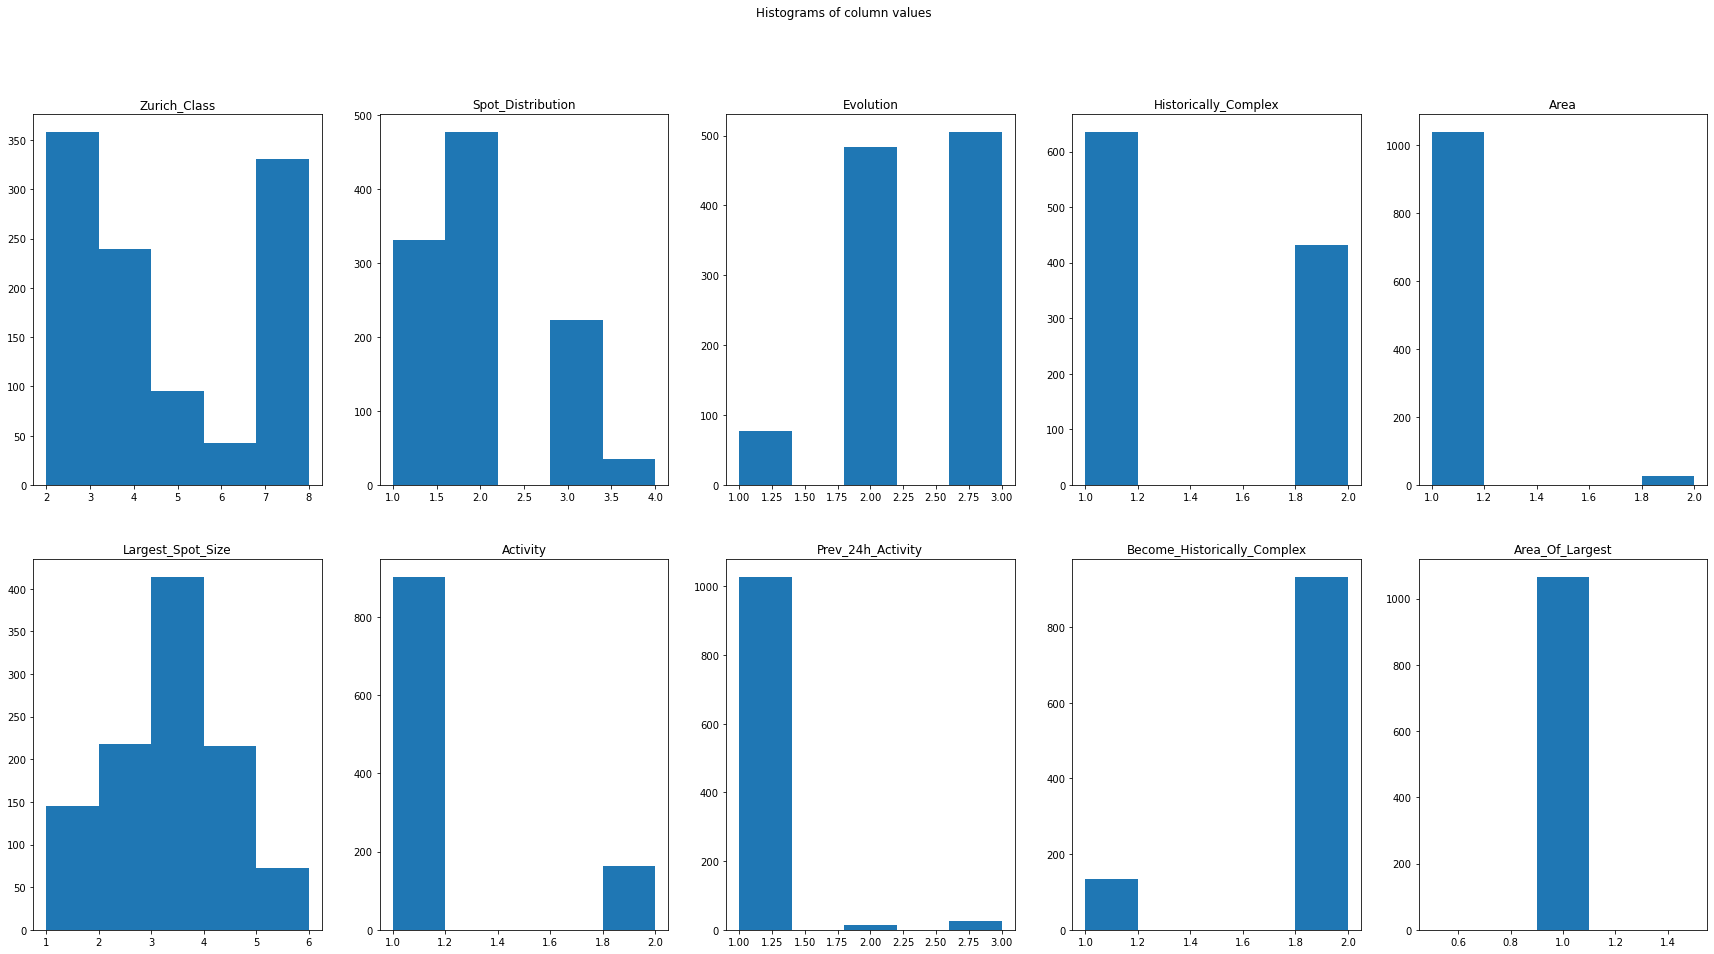

In [54]:
fig, axs = plt.subplots(2,5)
counter = 0

for i in range(0,5):
    for j in range(0,2):
        columnname = col[counter]
        axs[j,i].hist(df[columnname], bins=5)
        axs[j,i].title.set_text(columnname)
        counter += 1

fig.suptitle('Histograms of column values')
fig.set_figheight(15)
fig.set_figwidth(30)

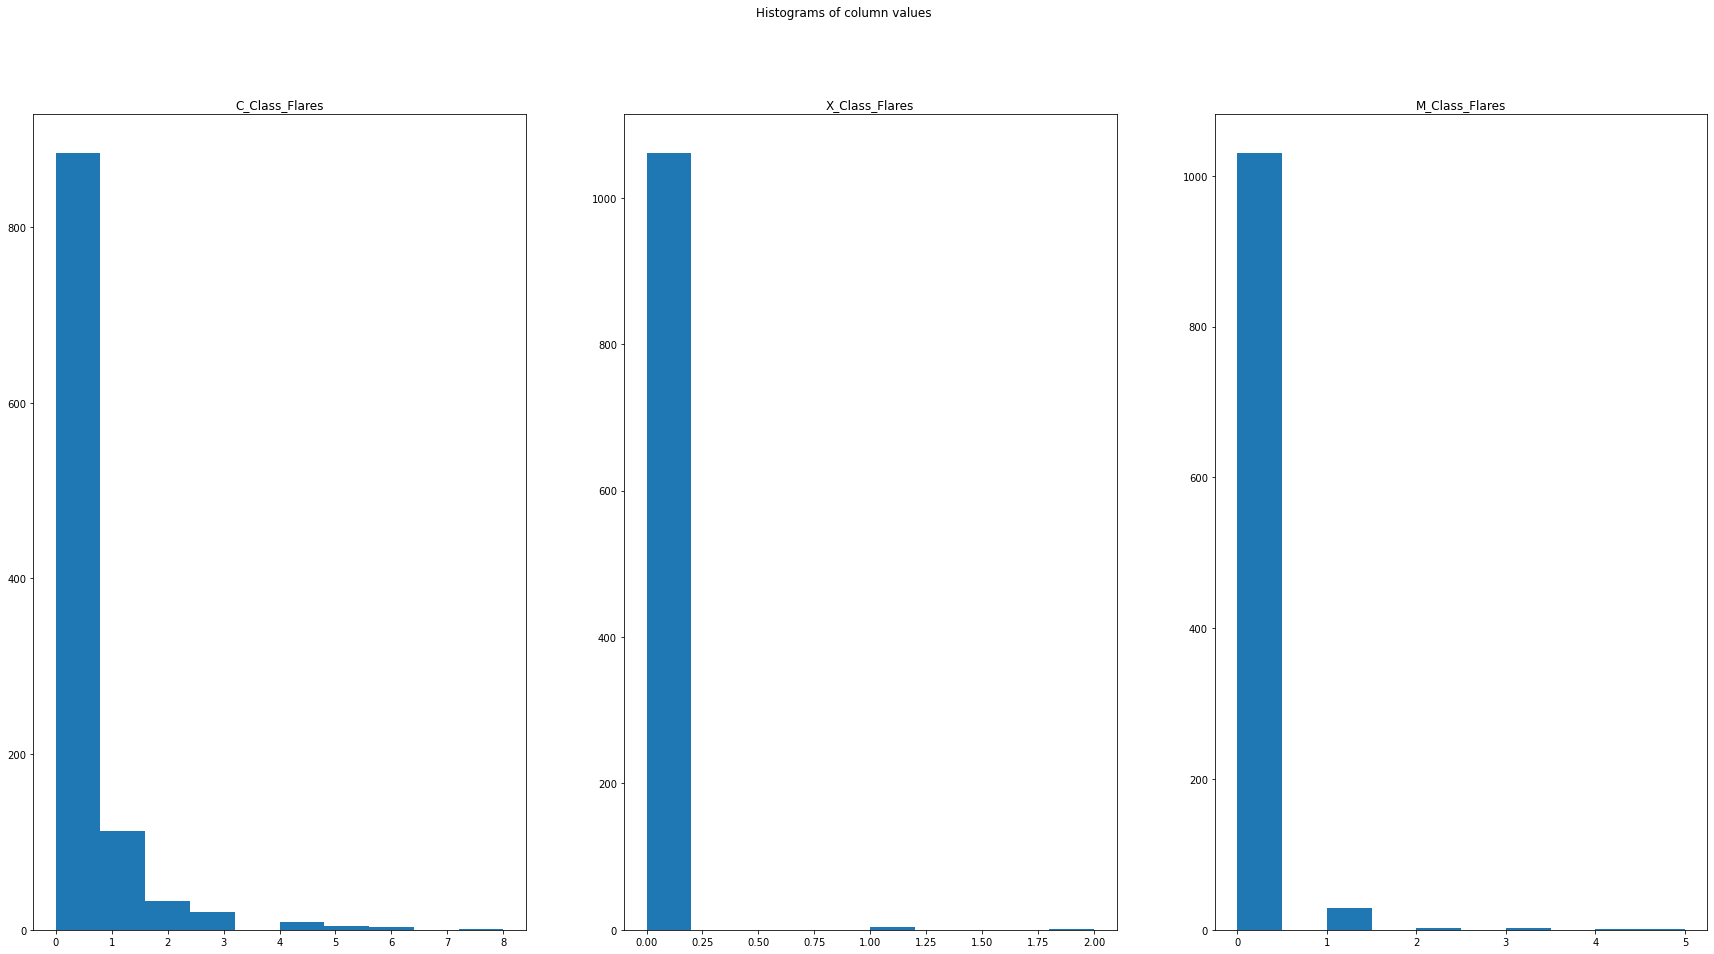

In [55]:
fig, axs = plt.subplots(1,3)
counter = 0
colTarget = ['C_Class_Flares','X_Class_Flares','M_Class_Flares']

for i in range(0,3):
        columnname = colTarget[counter]
        axs[i].hist(df[columnname], bins=10)
        axs[i].title.set_text(columnname)
        counter += 1

fig.suptitle('Histograms of column values')
fig.set_figheight(15)
fig.set_figwidth(30)

In [58]:
for i in df.columns :
    print(f'Column : {i}')
    for j in df[i].unique():
        uniqueCount = df[df[i] == j][i].count()
        print(f'Value {j} : {uniqueCount}')

Column : Zurich_Class
Value 8 : 331
Value 4 : 239
Value 3 : 211
Value 2 : 147
Value 5 : 95
Value 6 : 43
Column : Largest_Spot_Size
Value 4 : 216
Value 2 : 218
Value 3 : 414
Value 1 : 145
Value 6 : 46
Value 5 : 27
Column : Spot_Distribution
Value 1 : 331
Value 2 : 477
Value 3 : 223
Value 4 : 35
Column : Activity
Value 1 : 902
Value 2 : 164
Column : Evolution
Value 3 : 505
Value 2 : 484
Value 1 : 77
Column : Prev_24h_Activity
Value 1 : 1028
Value 3 : 25
Value 2 : 13
Column : Historically_Complex
Value 1 : 635
Value 2 : 431
Column : Become_Historically_Complex
Value 1 : 133
Value 2 : 933
Column : Area
Value 1 : 1039
Value 2 : 27
Column : Area_Of_Largest
Value 1 : 1066
Column : C_Class_Flares
Value 0 : 884
Value 1 : 112
Value 5 : 4
Value 2 : 33
Value 3 : 20
Value 8 : 1
Value 4 : 9
Value 6 : 3
Column : M_Class_Flares
Value 0 : 1030
Value 1 : 29
Value 4 : 1
Value 3 : 2
Value 2 : 3
Value 5 : 1
Column : X_Class_Flares
Value 0 : 1061
Value 1 : 4
Value 2 : 1


## 2.3 Conclusion

Taking a look at our min and max values of each column doesn't show anything sticking out. All values seem relatively close to each other. Next we look at a histogram to see if any values seem to single out. We also take a look at the unique values of each column and their counts numericaly. Mostly due to the scale of some values having a much larger count than other bins in our histogram. It doesn't appear that we have any outliers or extreme values.
We added in column names and converted our categorical data to numeric data. We found no missing values and no extreme values. This dataframe will now be exported and used for the rest of the capstone.

In [59]:
df.to_csv('FlareDataClean.csv',index = False)